In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
df1= pd.read_csv('sargento-270218.csv', header=None, skiprows=1, names=['#','Datetime','AbsPres','Temp','waterlevel'])
df2= pd.read_csv('sargentosal-270218.csv', header=None,skiprows=1, names=['#','Datetime','CondHighRng','Temp','SpecificConductance','salinity'])

In [3]:
df1.head

<bound method NDFrame.head of          #             Datetime  AbsPres    Temp  waterlevel
0        1  02/04/2018 09:45:00  108.068  17.094       0.060
1        2  02/04/2018 10:00:00  107.815  16.903       0.035
2        3  02/04/2018 10:15:00  107.791  16.903       0.032
3        4  02/04/2018 10:30:00  107.791  16.903       0.032
4        5  02/04/2018 10:45:00  107.791  16.903       0.032
5        6  02/04/2018 11:00:00  107.791  16.903       0.032
6        7  02/04/2018 11:15:00  107.791  16.903       0.032
7        8  02/04/2018 11:30:00  107.791  16.903       0.032
8        9  02/04/2018 11:45:00  107.767  16.903       0.030
9       10  02/04/2018 12:00:00  107.743  16.903       0.028
10      11  02/04/2018 12:15:00  107.720  16.903       0.025
11      12  02/04/2018 12:30:00  107.684  16.903       0.022
12      13  02/04/2018 12:45:00  107.660  16.903       0.019
13      14  02/04/2018 13:00:00  107.636  16.903       0.017
14      15  02/04/2018 13:15:00  107.625  16.903       

In [4]:
df1.head()

,#,Datetime,AbsPres,Temp,waterlevel
0,1,02/04/2018 09:45:00,108.068,17.094,0.060
1,2,02/04/2018 10:00:00,107.815,16.903,0.035
2,3,02/04/2018 10:15:00,107.791,16.903,0.032
3,4,02/04/2018 10:30:00,107.791,16.903,0.032
4,5,02/04/2018 10:45:00,107.791,16.903,0.032


In [5]:
df2.head()

,#,Datetime,CondHighRng,Temp,SpecificConductance,salinity
0,1,02/04/2018 09:30:00,50782.6,17.53,59295.4,39.6728
1,2,02/04/2018 09:45:00,50617.2,17.33,59362.4,39.7235
2,3,02/04/2018 10:00:00,50646.3,17.23,59526.8,39.8482
3,4,02/04/2018 10:15:00,50772.9,17.17,59753.7,40.0203
4,5,02/04/2018 10:30:00,51007.8,17.14,60068.6,40.2595


In [6]:
df1.dtypes

#               int64
Datetime       object
AbsPres       float64
Temp          float64
waterlevel    float64
dtype: object

In [7]:
df2.dtypes

#                        int64
Datetime                object
CondHighRng            float64
Temp                   float64
SpecificConductance    float64
salinity               float64
dtype: object

In [8]:
df1=pd.DataFrame(df1)

In [9]:
df2=pd.DataFrame(df2)

In [10]:
df1['Ndate'] = pd.to_datetime(df1['Datetime'], format='%m/%d/%Y %H:%M:%S')
df1['month'] = df1['Ndate'].dt.month
df1.head() 

,#,Datetime,AbsPres,Temp,waterlevel,Ndate,month
0,1,02/04/2018 09:45:00,108.068,17.094,0.060,2018-02-04 09:45:00,2
1,2,02/04/2018 10:00:00,107.815,16.903,0.035,2018-02-04 10:00:00,2
2,3,02/04/2018 10:15:00,107.791,16.903,0.032,2018-02-04 10:15:00,2
3,4,02/04/2018 10:30:00,107.791,16.903,0.032,2018-02-04 10:30:00,2
4,5,02/04/2018 10:45:00,107.791,16.903,0.032,2018-02-04 10:45:00,2


In [11]:
df2['Ndate'] = pd.to_datetime(df2['Datetime'], format='%m/%d/%Y %H:%M:%S')
df2['month'] = df2['Ndate'].dt.month
df2.head() 

,#,Datetime,CondHighRng,Temp,SpecificConductance,salinity,Ndate,month
0,1,02/04/2018 09:30:00,50782.6,17.53,59295.4,39.6728,2018-02-04 09:30:00,2
1,2,02/04/2018 09:45:00,50617.2,17.33,59362.4,39.7235,2018-02-04 09:45:00,2
2,3,02/04/2018 10:00:00,50646.3,17.23,59526.8,39.8482,2018-02-04 10:00:00,2
3,4,02/04/2018 10:15:00,50772.9,17.17,59753.7,40.0203,2018-02-04 10:15:00,2
4,5,02/04/2018 10:30:00,51007.8,17.14,60068.6,40.2595,2018-02-04 10:30:00,2


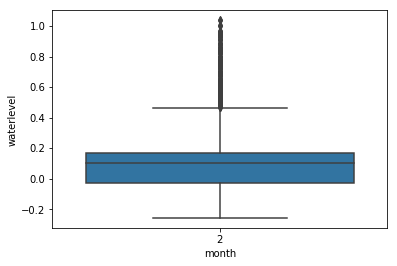

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x="month", y="waterlevel", data=df1)
plt.show()

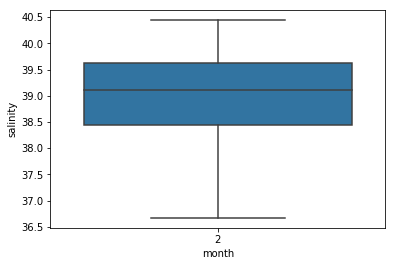

In [13]:

bx = sns.boxplot(x="month", y="salinity", data=df2)
plt.show()

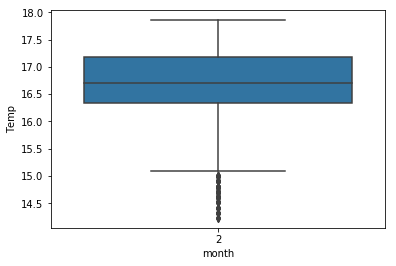

In [14]:
cx=sns.boxplot(x="month", y="Temp", data=df1)
plt.show()

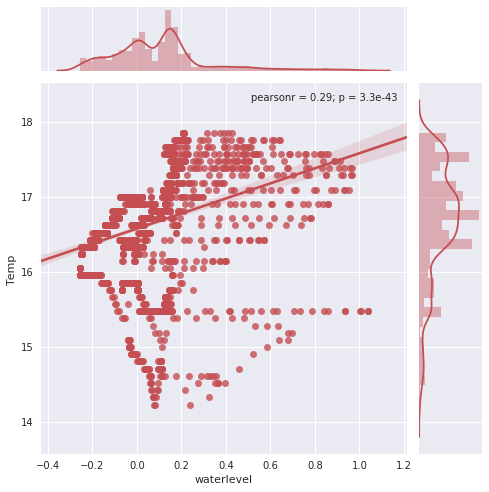

In [15]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("waterlevel", "Temp", data=df1, kind="reg",
                   color="r", size=7)
plt.show(g)

In [16]:
df4= pd.concat([df2['salinity'], df1['Temp']],axis=1)
df4.head(5)


,salinity,Temp
0,39.6728,17.094
1,39.7235,16.903
2,39.8482,16.903
3,40.0203,16.903
4,40.2595,16.903


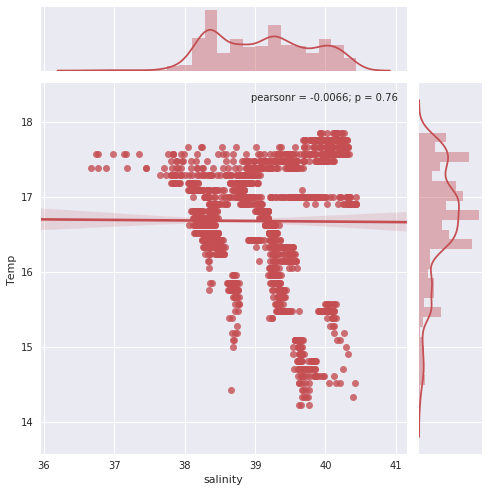

In [17]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("salinity", "Temp", data=df4, kind="reg",
                   color="r", size=7)
df4= pd.concat([df2['salinity'], df1['Temp']],axis=1)
plt.show(g)

In [18]:
df3=pd.concat([df1['waterlevel'], df2['salinity']],axis=1)
df3.head(5)


,waterlevel,salinity
0,0.060,39.6728
1,0.035,39.7235
2,0.032,39.8482
3,0.032,40.0203
4,0.032,40.2595


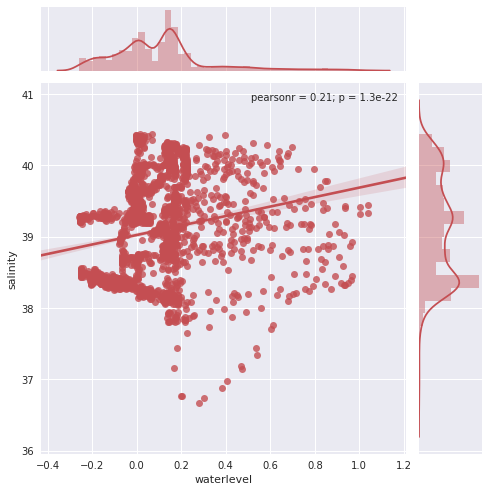

In [19]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("waterlevel", "salinity", data=df3, kind="reg",
                   color="r", size=7)
df3=pd.concat([df1['waterlevel'], df2['salinity']],axis=1)
plt.show(g)



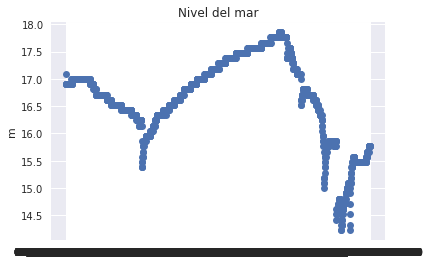

In [24]:
plt.plot_date(x=df1.Datetime, y=df1['Temp'], fmt="b-")
plt.title("Nivel del mar")
plt.ylabel("m")
plt.grid(True)
plt.show()

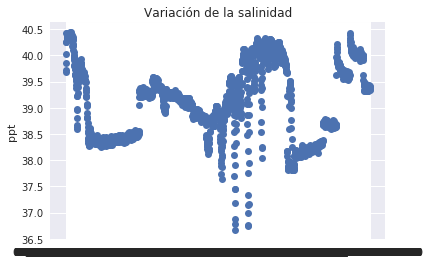

In [25]:
plt.plot_date(x=df2.Datetime, y=df2['salinity'], fmt="b-")
plt.title("Variación de la salinidad")
plt.ylabel("ppt")
plt.grid(True)
plt.show()

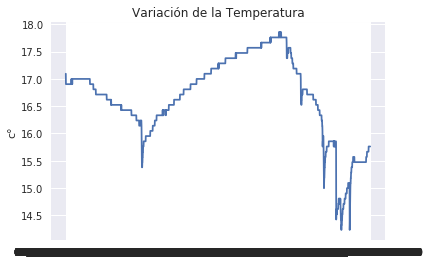

In [27]:
plt.plot_date(x=df2.Datetime, y=df1['Temp'], fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("c°")
plt.grid(True)
plt.show()

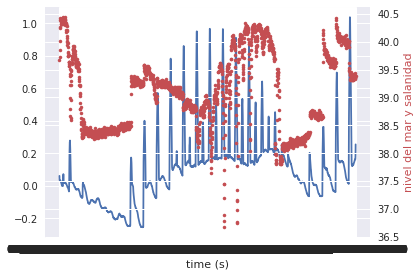

In [30]:
fig, ax1 = plt.subplots()
a=df1.waterlevel
b=df2.salinity
t=df1.Datetime
ax1.plot(t, a, 'b-')
ax1.set_xlabel('time (s)')

ax2 = ax1.twinx()
ax2.plot(t, b, 'r.')
ax2.set_ylabel('nivel del mar y salanidad', color='r')
fig.tight_layout()

plt.show()

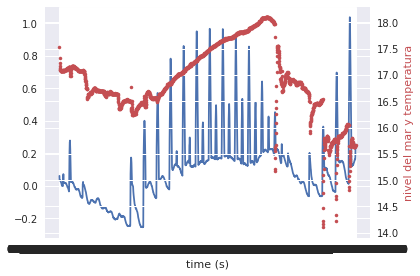

In [31]:
fig, ax1 = plt.subplots()
a=df1.waterlevel
b=df2.Temp
t=df1.Datetime
ax1.plot(t, a, 'b-')
ax1.set_xlabel('time (s)')

ax2 = ax1.twinx()
ax2.plot(t, b, 'r.')
ax2.set_ylabel('nivel del mar y temperatura', color='r')
fig.tight_layout()

plt.show()

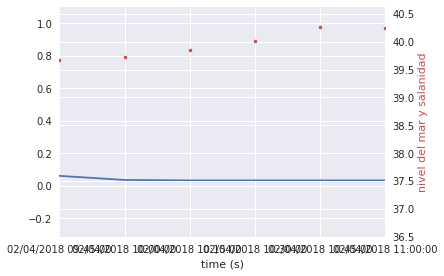

In [37]:
fig, ax1 = plt.subplots()
a=df1.waterlevel
b=df2.salinity
t=df1.Datetime
ax1.plot(t, a, 'b-')
ax1.set_xlabel('time (s)')

ax2 = ax1.twinx()
ax2.plot(t, b, 'r.')
ax2.set_ylabel('nivel del mar y salanidad', color='r')
fig.tight_layout()
plt.xlim((0,5))
plt.show()

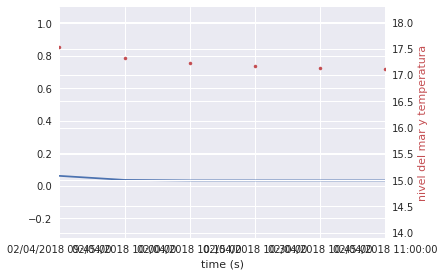

In [36]:
fig, ax1 = plt.subplots()
a=df1.waterlevel
b=df2.Temp
t=df1.Datetime
ax1.plot(t, a, 'b-')
ax1.set_xlabel('time (s)')

ax2 = ax1.twinx()
ax2.plot(t, b, 'r.')
ax2.set_ylabel('nivel del mar y temperatura', color='r')
fig.tight_layout()

plt.xlim((0,5))
plt.show()